In [1]:
# importing libraries

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as numpy
import pandas as pd
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import optimizers, regularizers
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
# loading the dataset
dataset = pd.read_csv('/home/em/Desktop/kc_house_data.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
print(dataset['bedrooms'].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


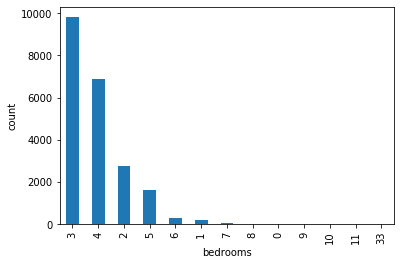

In [6]:
dataset['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('bedrooms')
plt.ylabel('count')
plt.show()

In [8]:
# we are going to predict the price column based on our training set
x = dataset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
             'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = dataset['price']

In [9]:
# training set = 75% and testing set = 25%
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.25, random_state=2)
print(len(X_train))

16209


In [16]:
reg = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
                                         learning_rate=0.1, loss='ls')
# we can also use reg = LinearRegression() but in that case the accuracy of prediction is not as good as this one
reg.fit(X_train, Y_train)
print(reg.score(X_test, Y_test) * 100)

90.6965133244281


In [18]:
result = reg.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predict': result.round()})
print(df)

          Actual    Predict
6638    735000.0   713648.0
7366   1150000.0  1232630.0
3158    350500.0   454490.0
9117    860000.0  1035693.0
3392    122000.0   165036.0
...          ...        ...
8820    213500.0   219782.0
16980   401000.0   398455.0
11269   619000.0   674725.0
5496    640000.0   616337.0
20599   376000.0   356581.0

[5404 rows x 2 columns]


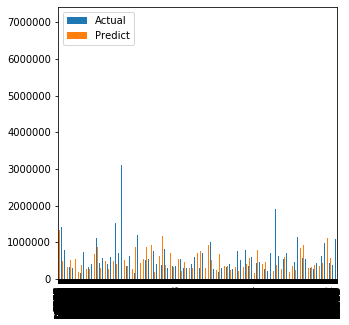

In [19]:
df.plot(kind='bar', figsize=(5, 5))
plt.show()